<a href="https://colab.research.google.com/github/jsberriman/JSB-Thinkful-DSF/blob/master/Module_29_Checkpoint_10_Challenge_Unsupervised_Clustering_Wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pick a dataset. It could be one you've worked with before or it could be a new one. Then: 

* Apply dimensionality reduction techniques to visualize the observations.
* Apply clustering techniques to group together similar observations.

# Try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.


In [0]:
# Initial imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import datasets

* Im going to work with the wine dataset from SKlearn; small enough to run all of the algorithms given my limited computational resources via Colab, esp t-SNE that is computationally intensive.
* I'll start with the 'big 3' dimensionality reduction methods we reviewed in the curcciculum
  1. PCA
  2. t-SNE
  3. UMAP

In [0]:
# load sklearn 'wine' dataset
wine = datasets.load_wine()
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [0]:
# create dataframe from
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=wine['feature_names'] + ['target'])

In [0]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [0]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.6 KB


In [0]:
wine_df_features = wine_df.copy()
wine_df_features.drop(['target'], axis=1, inplace=True) 

In [0]:
wine_df_features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:
wine_df_target = wine_df.copy(wine_df.columns[-1])
wine_df_target.drop(wine_df_target.iloc[:, 0:13], inplace=True, axis=1)

In [0]:
wine_df_target.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [0]:
wine_df_target.target.unique()

array([0., 1., 2.])

# Dimensionality Reduction by PCA

In [0]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

# set our target 'y' and features 'X'
y = wine_df_target
X = wine_df_features

# standardize our data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Construct the first two principal components
pca = PCA(n_components=2)

# Get first two components on standardized features
pca_components = pca.fit_transform(X_std)

In [0]:
# construct labeled plot, colored by target
plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

KeyError: ignored

<Figure size 144x72 with 0 Axes>

## If I call the colored plotting boilerplate from the curriculum I get a KeyError; I think this is why. Let's troubleshoot.

In [0]:
print(X.shape, y.shape)

(178, 13) (178, 1)


The shape call here shows a column dimension to y, whereas in the curriculum it has only a length. 

In [0]:
print(len(X_std))

178


In [0]:
print(len(y))

178


In [0]:
print(pca_components.shape[0])

178


In [0]:
# construct labeled plot, colored by target
plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(len(pca_components)):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

KeyError: ignored

<Figure size 144x72 with 0 Axes>

Well, doing a length call to get around the dimension didn't help.  Looks like the error is in a different line.

In [0]:
print(pca_components[i, 0])

In [0]:
print(pca_components[1, 0])

2.209464916918843


In [0]:
print(str(y[i]))

KeyError: ignored

Now we're getting somewhere.  y[i] isn't working as intended for some reason.

In [0]:
print(y[0])

KeyError: ignored

In [0]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


Aha!  This needs to be an array, not a dataframe...

In [0]:
y = wine_df_target.to_numpy()

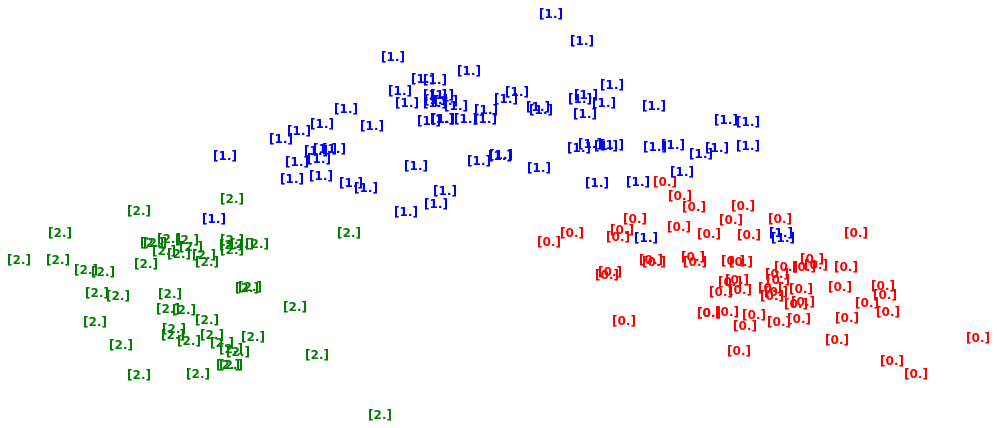

In [0]:
# construct labeled plot, colored by target
plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(len(pca_components)):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## PCA Plot

Got it working!

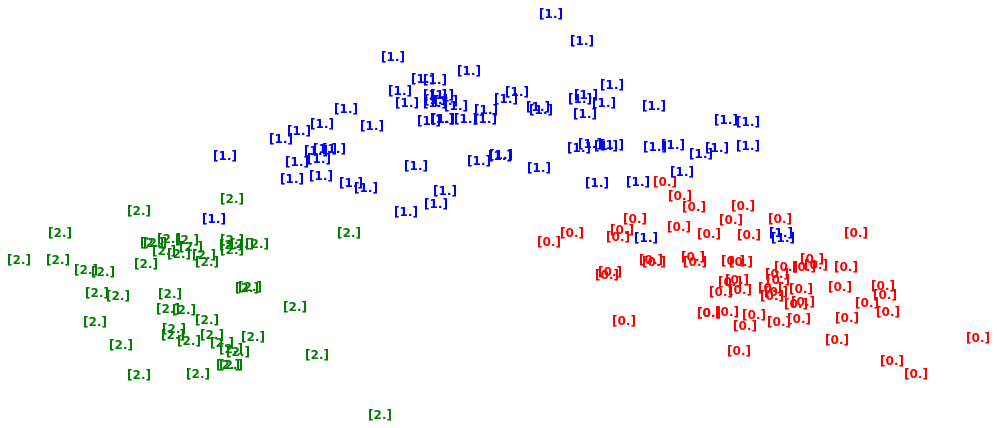

In [0]:
# construct labeled plot, colored by target
plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(len(pca_components)):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

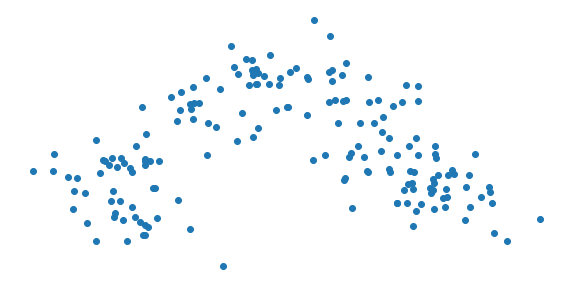

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This looks pretty decent when colored; clusters look to be fairly well defined with a couple of overlap points, esp. in 0/1.  

Uncolored, we don't really learn all that much after dimensionality reduction.  A loose U-shaped pattern isn't much to go off of.

No real hyperparameters to play with for PCA; let's move on to t-SNE

# Dimensionality Reduction by t-SNE

Let's try running t-SNE with the vanilla hyperparameters from the curriculum, and then adjust from there.

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.134607
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.206886
[t-SNE] KL divergence after 300 iterations: 0.105119


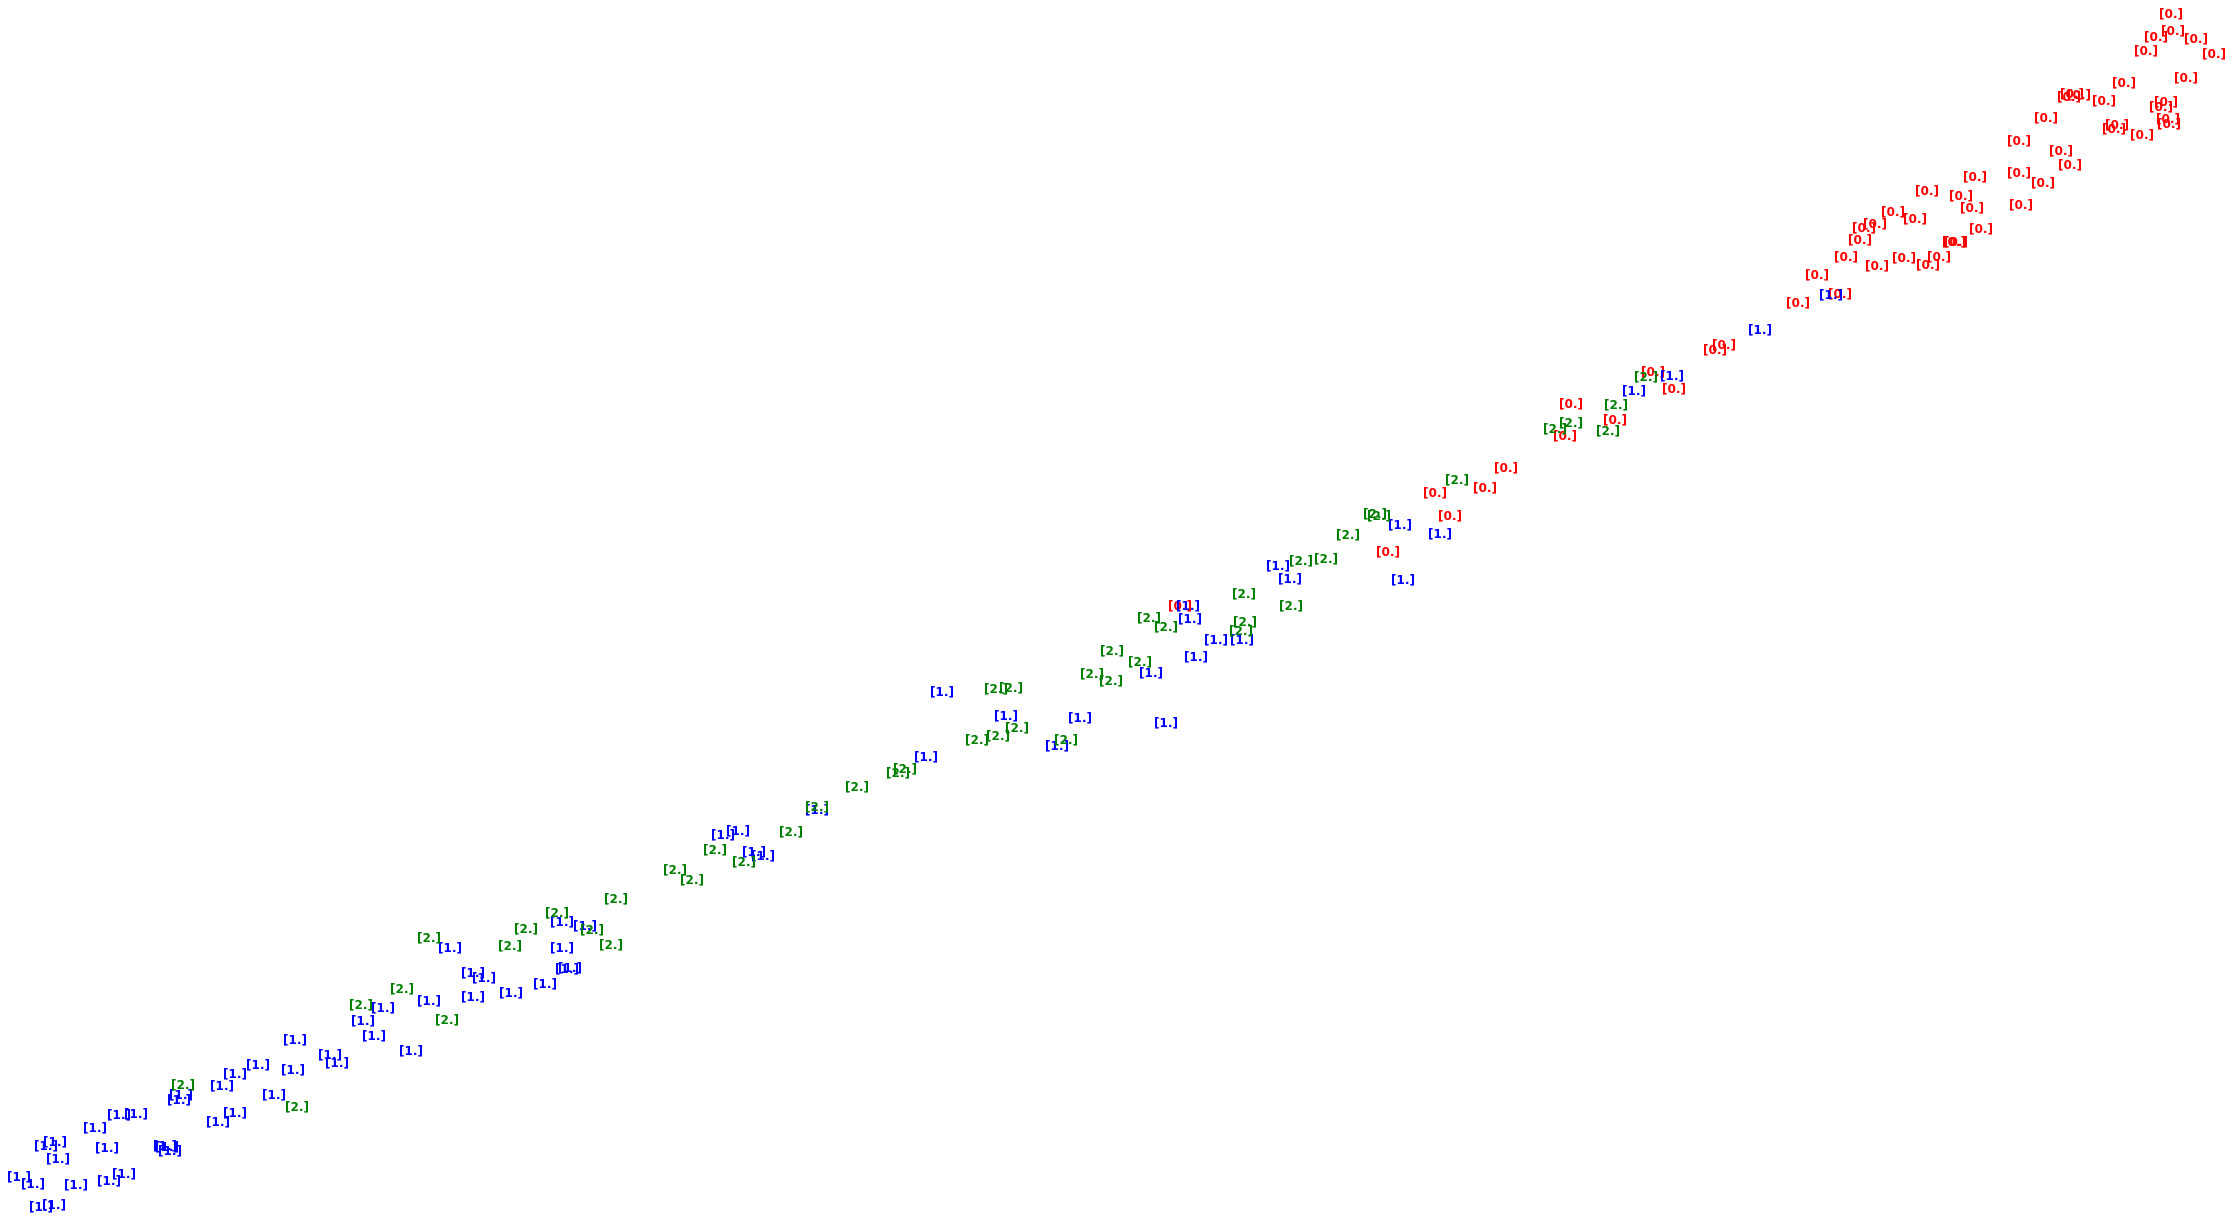

In [0]:
# same plotting call as prev checkpoint, replace pca with tsne
# figsize/font scaled down to fit colab window
plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Well that was unexpected.  t-SNE generates a linear relationship across the two components.  Maybe this changes with perplexity or iterations.

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.494211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.281494
[t-SNE] KL divergence after 300 iterations: 0.070965


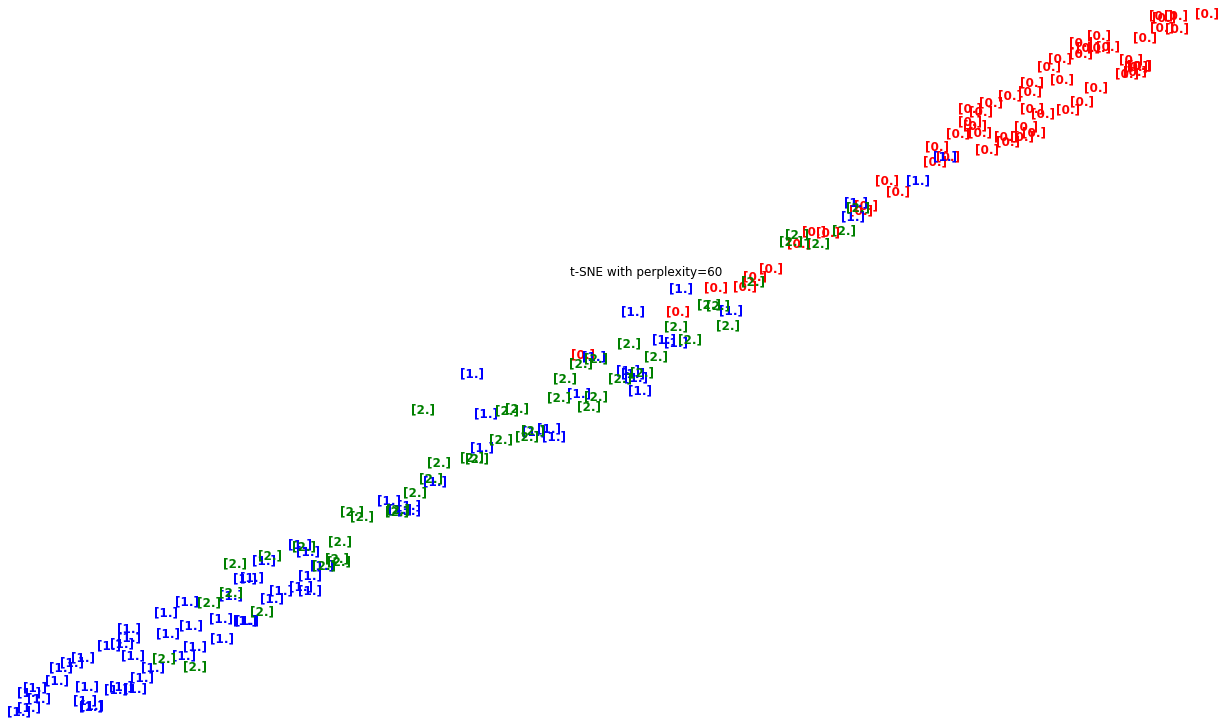

In [0]:
# tincrease perplexity to 60
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.title("t-SNE with perplexity=60")
plt.yticks([])
plt.axis('off')
plt.show()

Nope, same shape.  Maybe some iterations will break it out of this local parameter space?

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.134607
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.397053
[t-SNE] KL divergence after 750 iterations: 0.093235


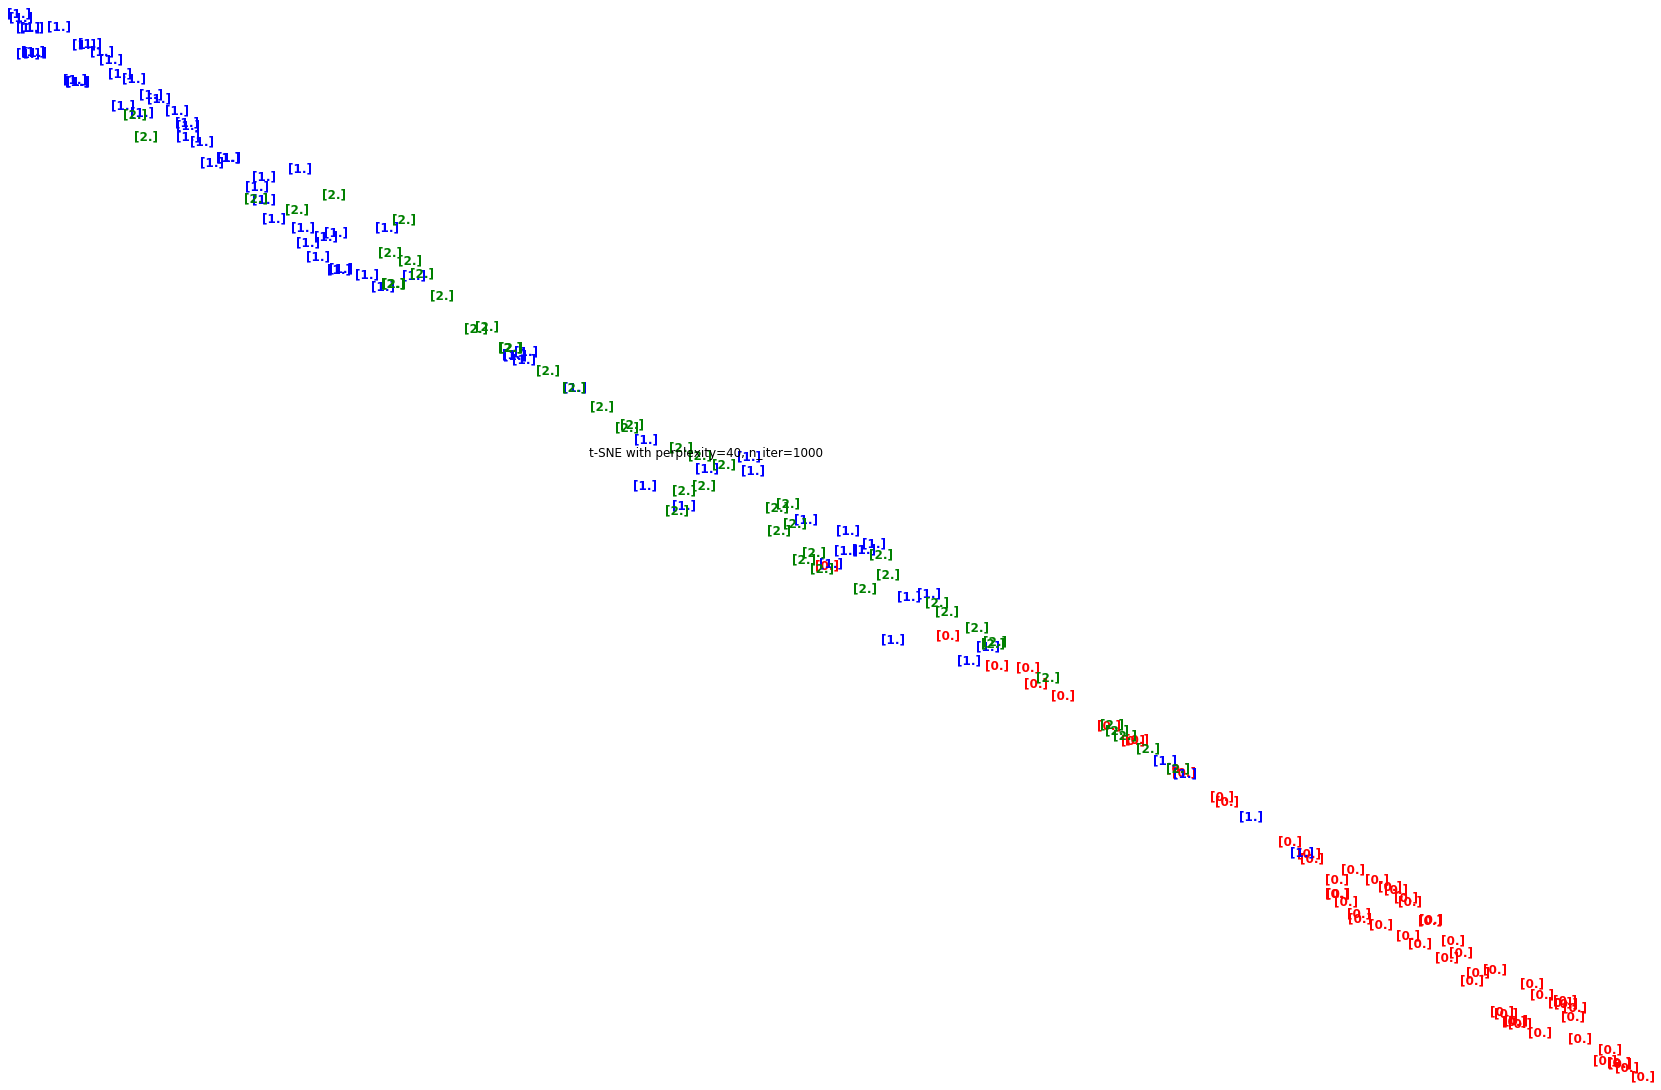

In [0]:
# increase iterations to 1000
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.title("t-SNE with perplexity=40, n_iter=1000 ")
plt.yticks([])
plt.axis('off')
plt.show()

Same pattern but just inverted; the inversion makes sense, given that t-SNE is probabilistic and can get different outcomes, but the linear pattern is still puzzling. 

After some reading, I think overall what this pattern is telling us is that this data is fairly linearly separable, hence a linear pattern to this distribution.  This is a dimensionality reduction after all, so I guess part of the variation here, maybe a dominant feature, is driving a very linear relationship betwee components 1 and 2.  My intuition tells me that this must mean that most of the features are pretty auto-correlated/multicollinear.

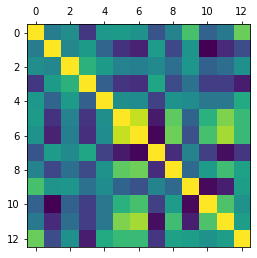

In [0]:
plt.matshow(wine_df_features.corr())
plt.show()

In [0]:
wine_df_features.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Maybe not massive multi-collinearity, but we have some correlations going on here.  Phenols and Flavanoids seem to have a very positive correlation with one another; perhaps one of them is assigned to component one and one is assigned to component two, and we get this linear relationship and most of the dynamic range in other features gets collapsed to a minor difference among points.

Let's try reducing perplexity before we move on to UMAP.

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 10.143081
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.462097
[t-SNE] KL divergence after 1000 iterations: 0.157316


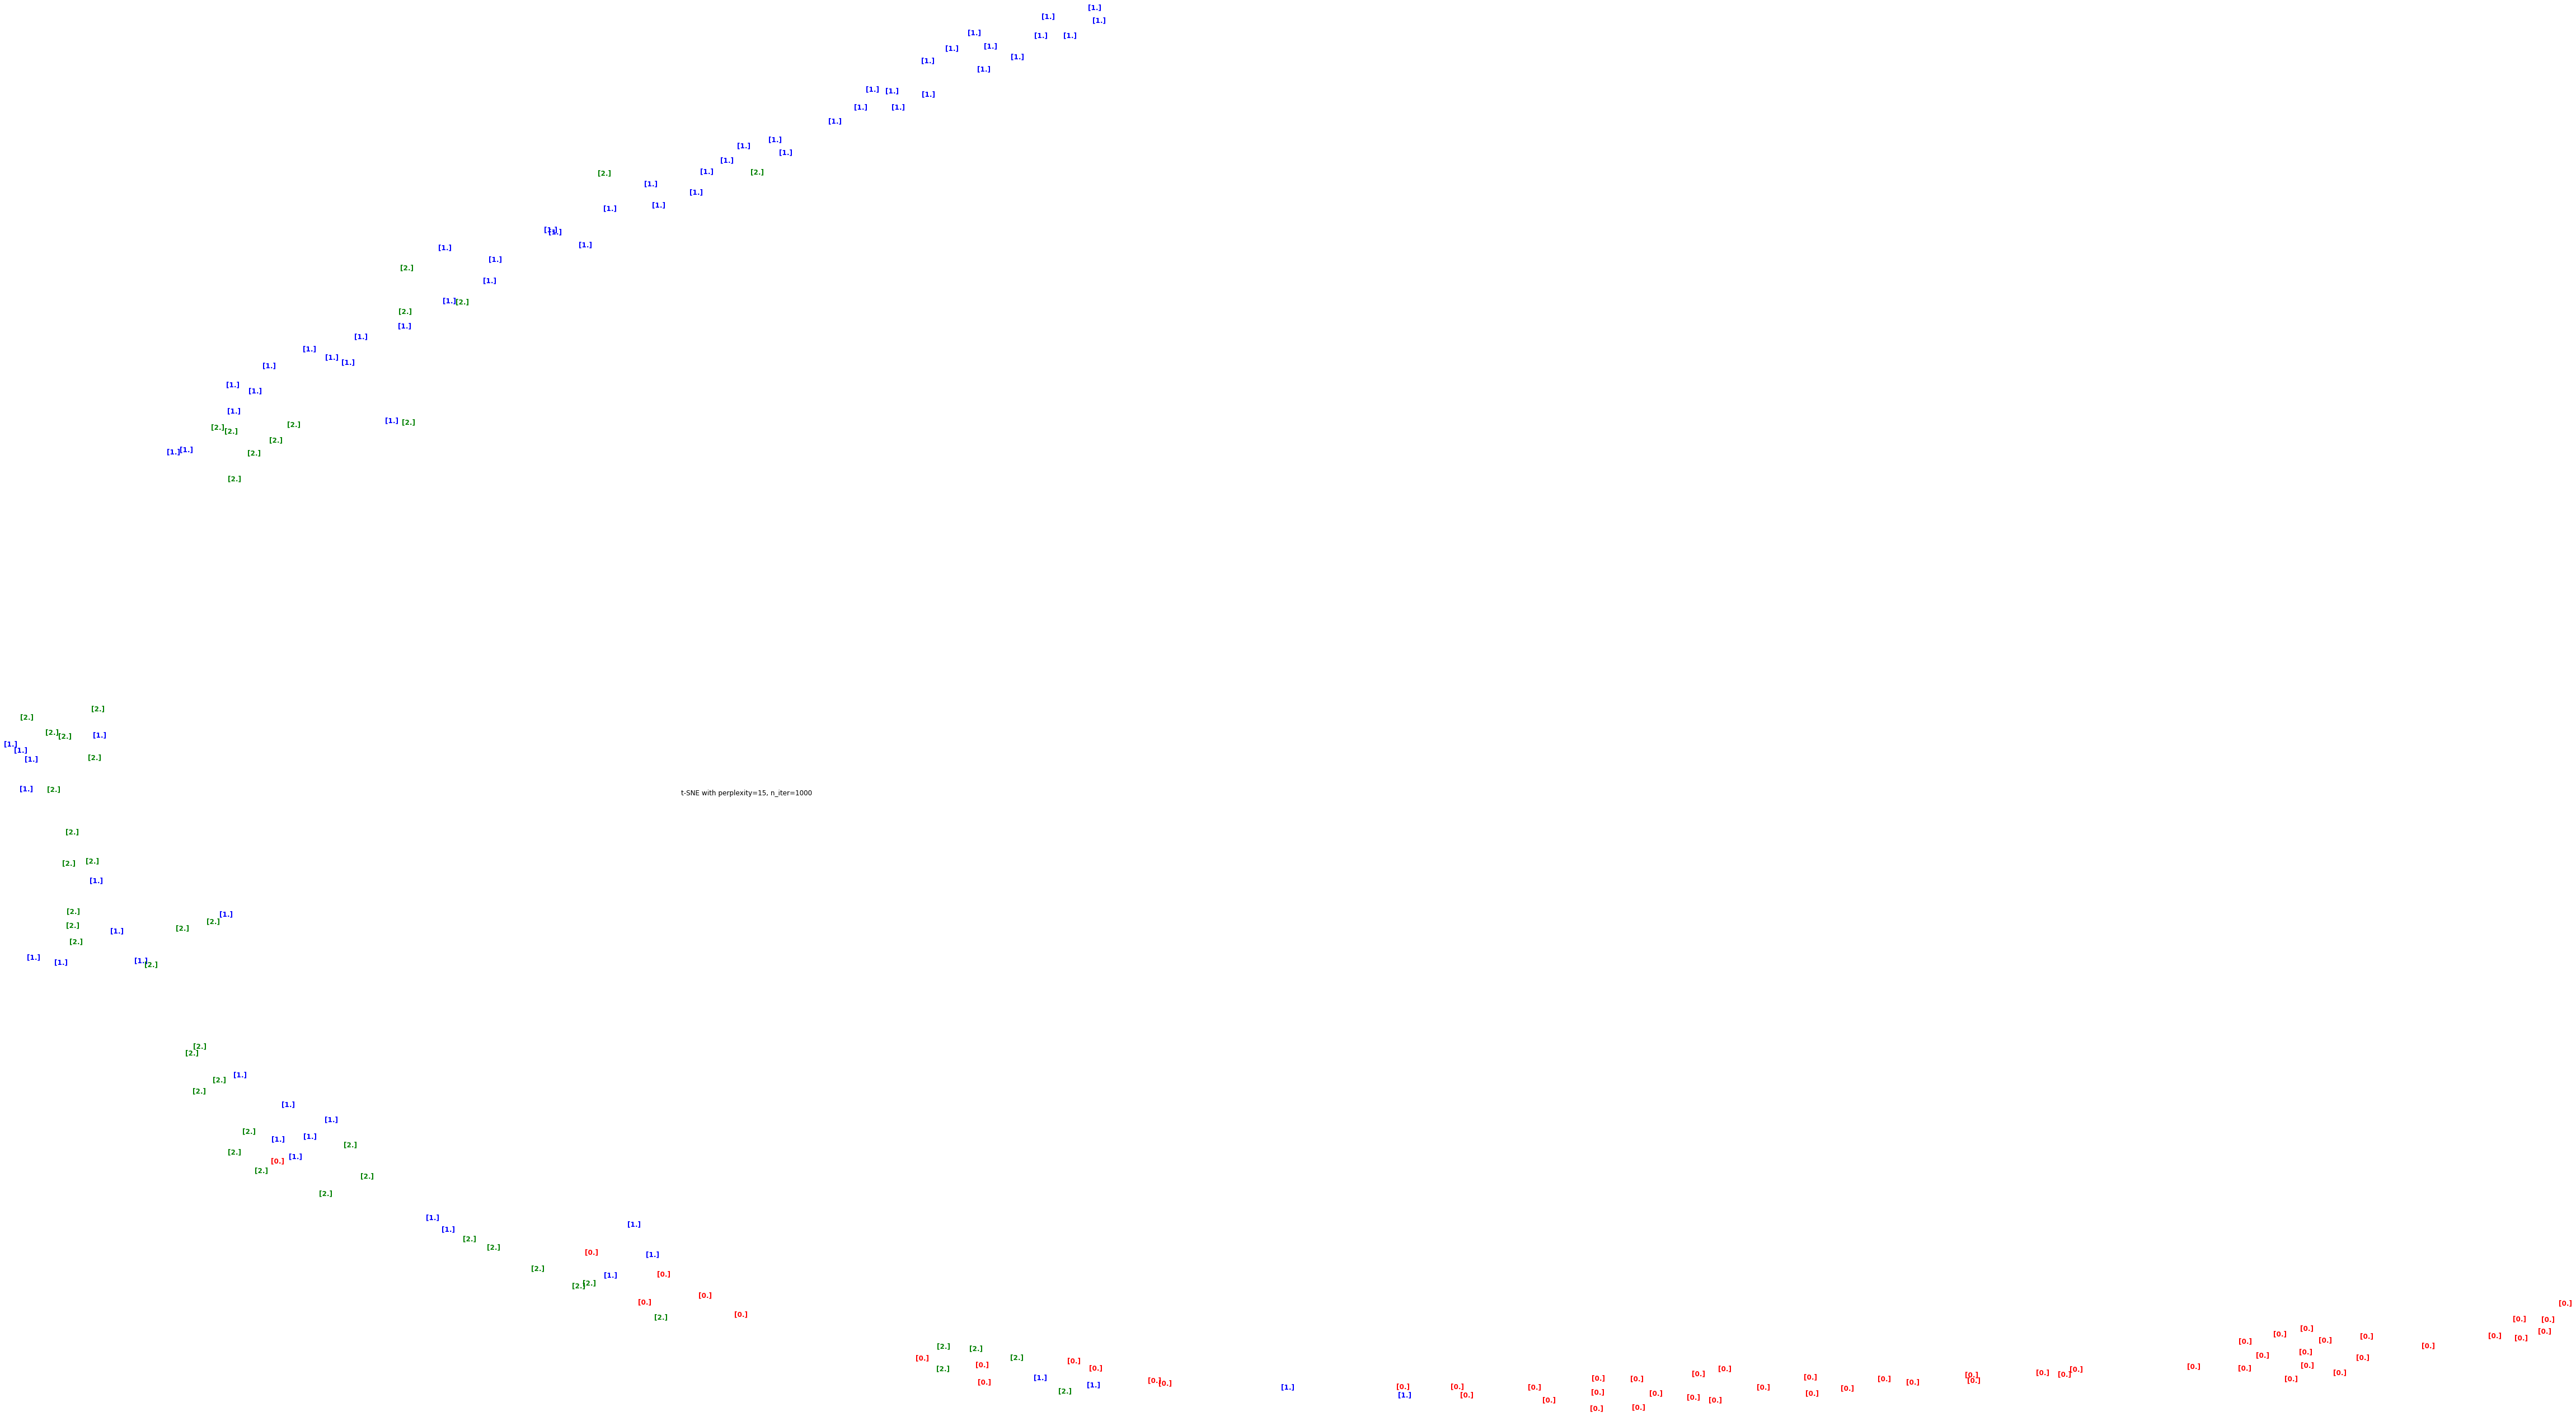

In [0]:
# increase iterations to 1000; reduce perplexity from 40 to 15
tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=1000)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.title("t-SNE with perplexity=15, n_iter=1000 ")
plt.yticks([])
plt.axis('off')
plt.show()

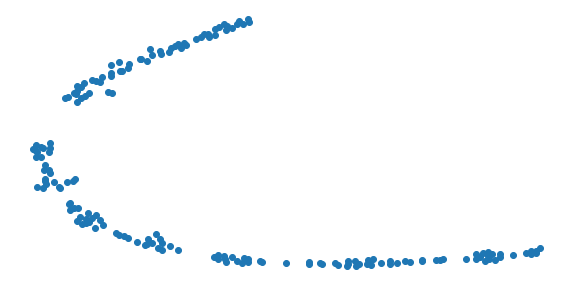

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Cool!  Dropping perplexity too far makes the plot unreadable due to huge distances, but a modest drop gets us some structure here. I guess this is why we should run GridSearch to optimize hyperparameters.

We now have a U-shaped/Curved pattern, similar to what we got withPCA. When labeled, we see some separation of '0' across the two axes.  '1' and '2' are pretty overlapped, and there's a rogue '0' right in the middle of the '1'/'2' overlapped cluster.  When unlabeled, it doesn't seem like much of an improvement over PCA, though perhaps that upper cluster of MOSTLY zeroes is a slight improvement.  

# Dimensionality Reduction by UMAP

In [0]:
import umap

time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 4.1431474685668945 seconds


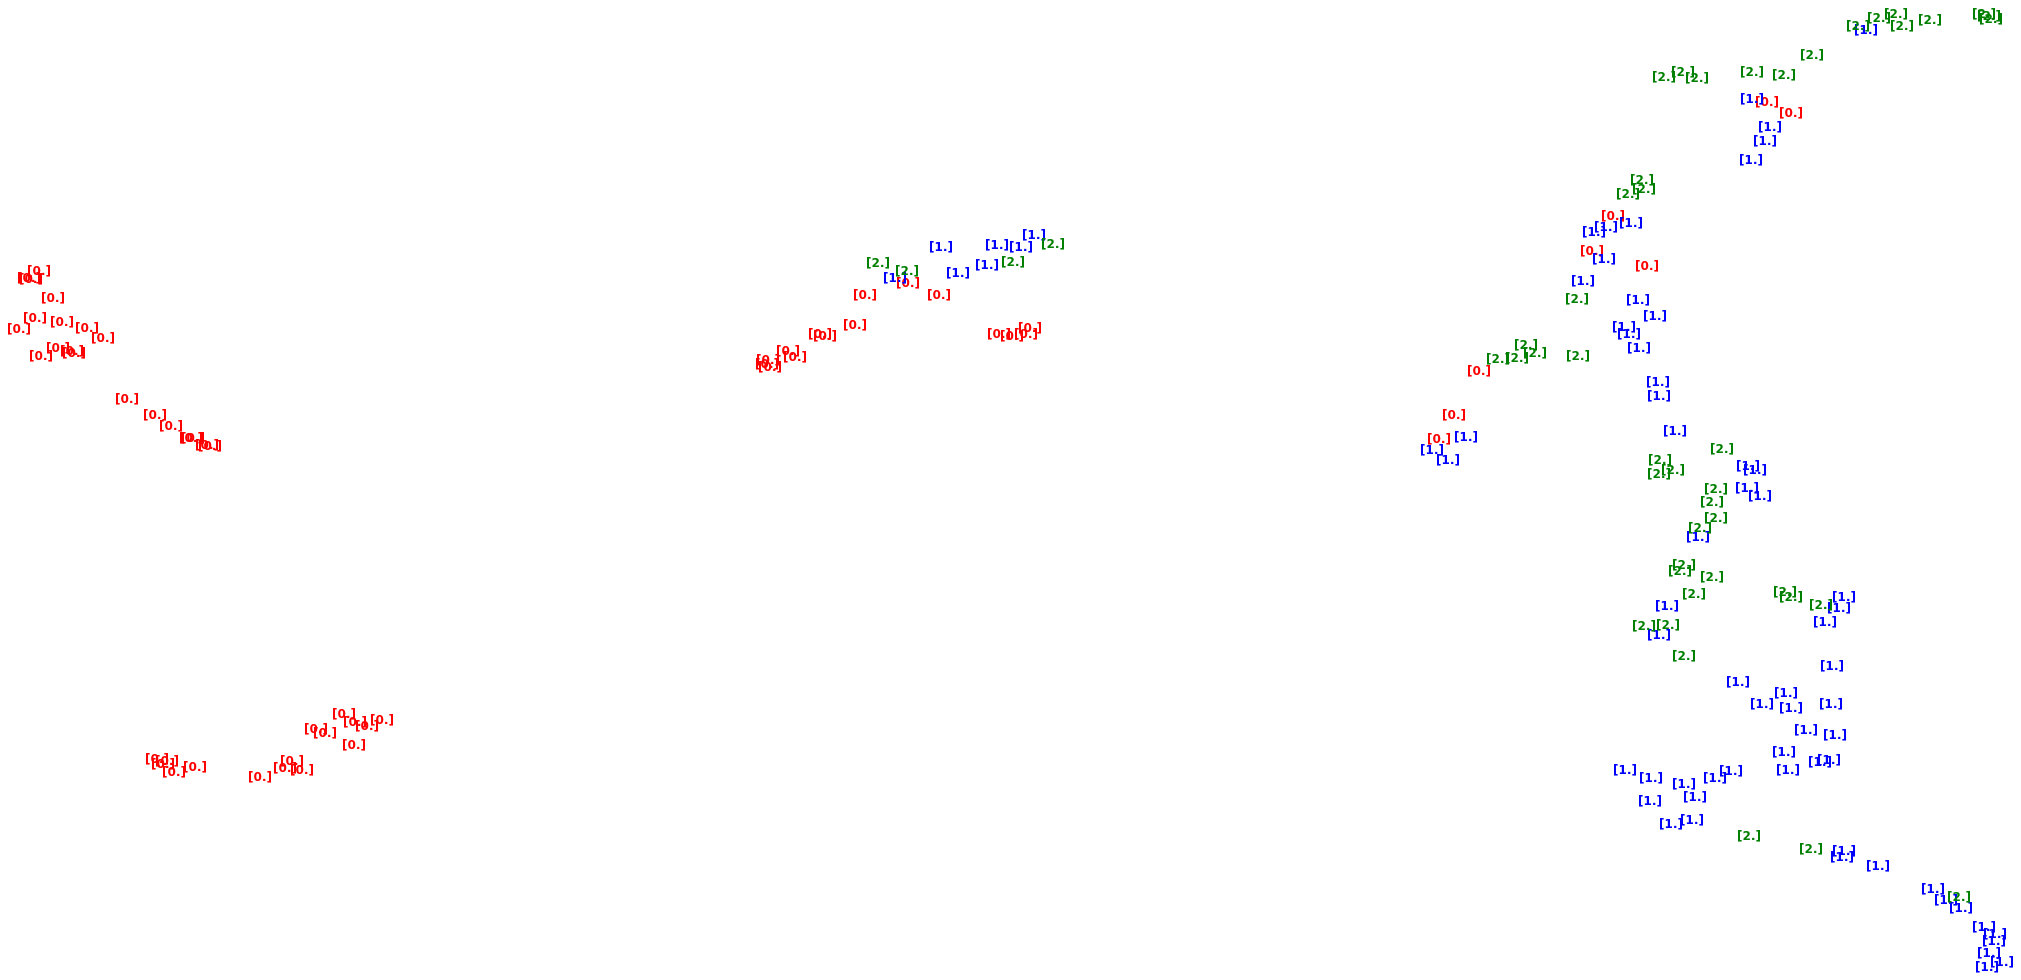

In [0]:
plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

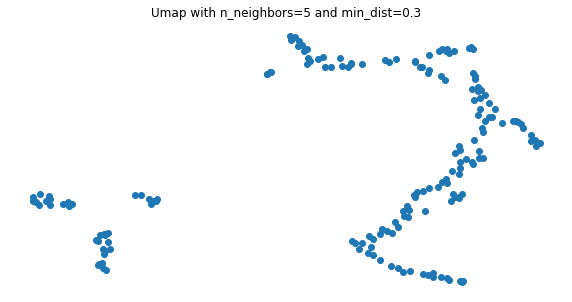

In [0]:
# uncolored plot of above; n_neighbors=5, min_dist=0.3
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Some separation of '0' from '1'/'2' overlap but a weird shape.  If these clusters weren't colored, much like in t-SNE I '1' and '2' are indistinguishable, overall the clustering pattern caused by this dimensionality reduction wouldn't be that 'correct', let alone informative.

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 10 separate connected components using meta-embedding (experimental)
  n_components


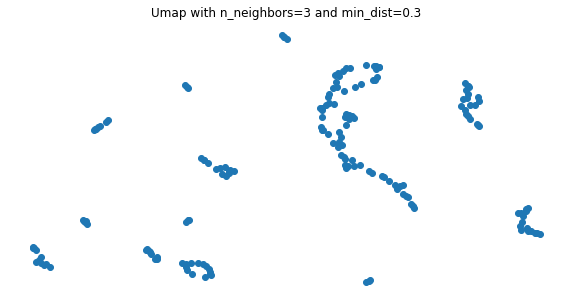

In [0]:
# reduce n_neighbors to 3
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Much like in the curriculum, reducing n_neighbors just adds noise; clustering gets worse.

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 10 separate connected components using meta-embedding (experimental)
  n_components


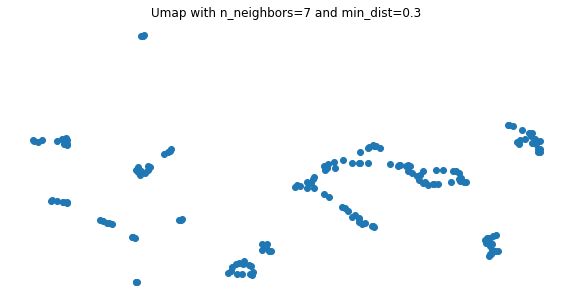

In [0]:
# increase n_neighbors to 7
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Doesn't look like adding neighbors really helps; if anything some of the clustering was broken up.  Let's see if more stringent/lax distance values help.

Starting to achieve that linear pattern from t-SNE again...

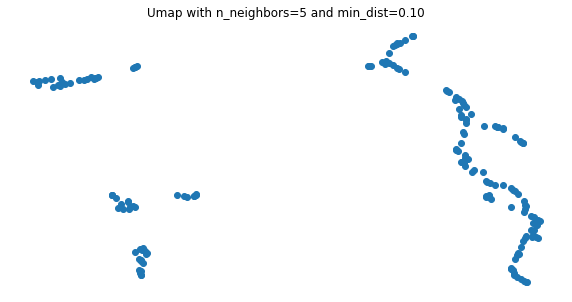

In [0]:
# reduce min_dist to 0.1
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.10,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5 and min_dist=0.10")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

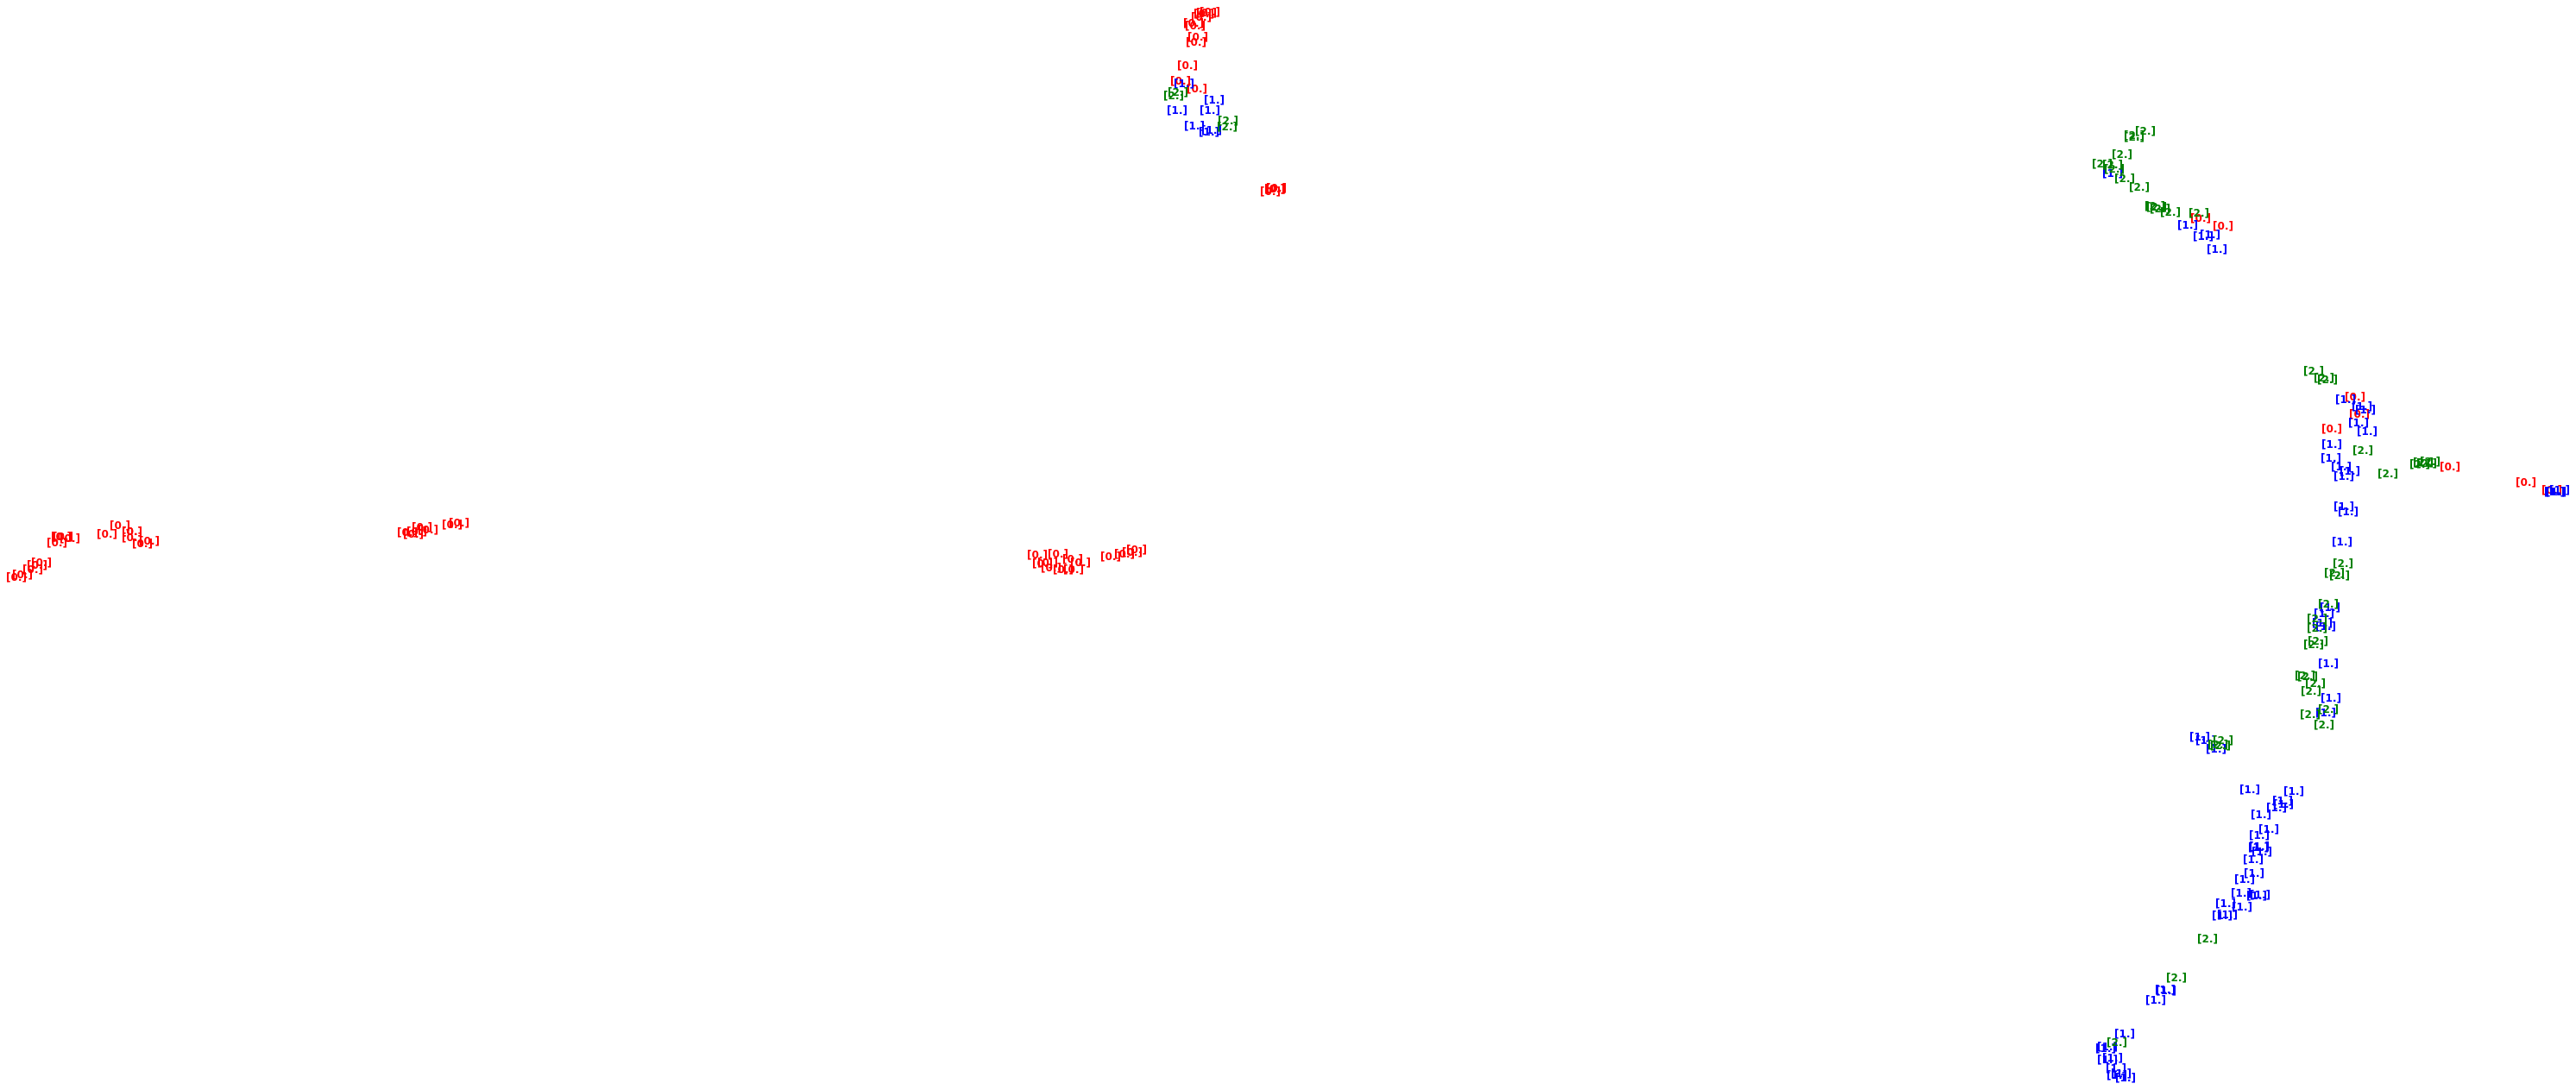

In [0]:
# reduce min_dist to 0.1
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.10,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

That looks interesting.  If labeled, I would assume the region to the right is the '1'/'2' overlap zone,  the  region bottom left are '0', and the top left region is part of '2' that has splintered off. 

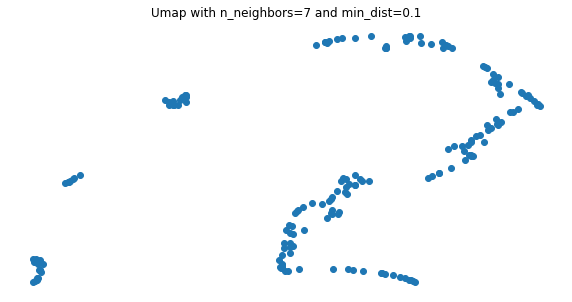

In [0]:
# reduce min_dist to 0.10, increase n_neighbors to 7
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.10,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=0.1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

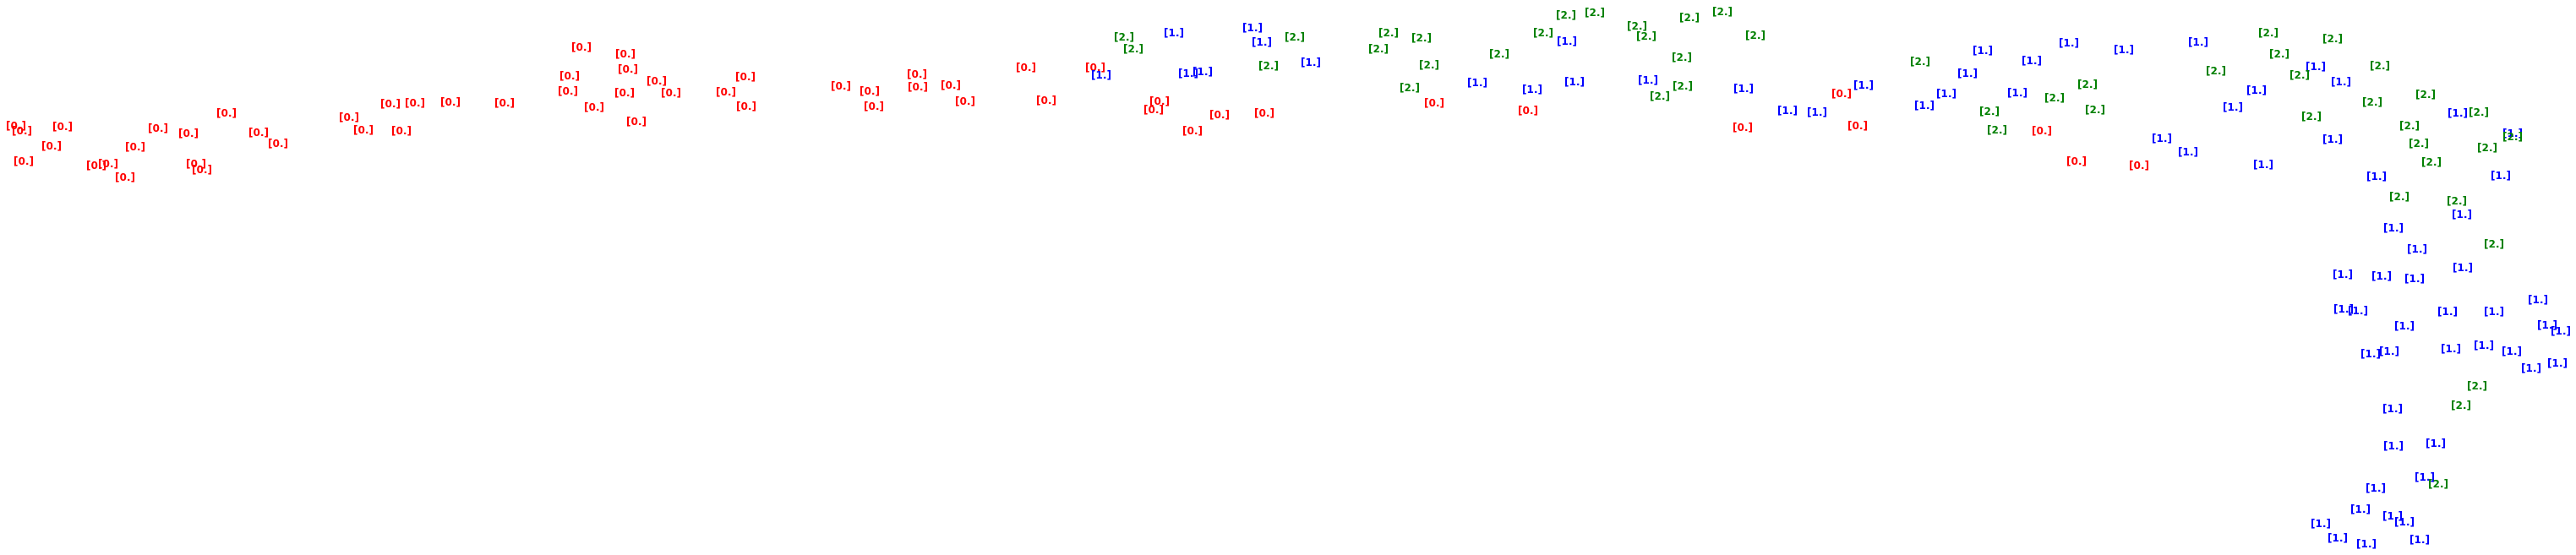

In [0]:
umap_results = umap.UMAP(n_neighbors=16,
                      min_dist=0.75,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(2,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 12}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

When colored, we see some points in '0' just seem to be quite similar to the bulk of '1'/'2' for some reason, regardless of number of neighbors or distance.

Uncolored, it's clear that we don't actually have that good of 'clusters' forming here.  

OVerall, it looks like lower valutes of min-distince and moderate values of n_neighbors seem to give us the best chance of getting some discrete patterns after dimensionality reduction. For example, even the first set of parameters we ran gave us fair amount of separating '0''s away from the bulk of the data, albeit in several little mini-clusters.  

# Comparison of Dimensionality Reduction Methods (PCA/t-SNE/UMAP)


Overall, I think UMAPwas the only dimensionality reduction technique that, in an unsupervised (and uncolored) setting seemed to naturally generate some structure.  While dimensionality reductions can't be expected to assign clusters, since that's not their point, it is good to identify techniques that can help us discover patterns in the data, such as clustering, without explicit calls for cluster assignment.  Dimensionality reduction techniques help us visualize pattens at higher dimensions than what we are capable of conceptualizing by bringing the dimensionality to a lower state that we can approach.  I think UMAP did the best job of this, likely because of the 'neighbor' and neighborhood distance aspects of this algorithm.

# Clustering by K-Means

We know that the data has three classes.  Let's make a plot just to visualize this, not with any real supervised learning but rather just using our 'target' for coloring the clusters and two features.  We can compare unsupervised clustering to this going forward.

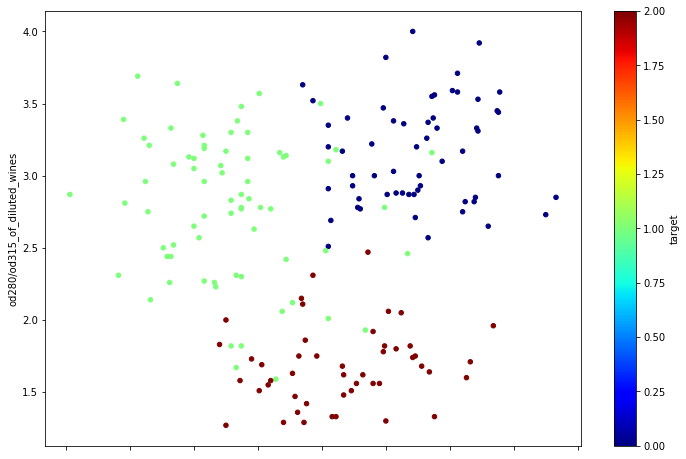

In [0]:
wine_df.plot.scatter(x = 'alcohol', y = 'od280/od315_of_diluted_wines', c= 'target', figsize=(12,8), colormap='jet');

We can see some overlap between clusters, but overall some decent definition here.

In [0]:
# set our target and features and standardize
# set our target 'y' and features 'X'
y = wine_df_target
#change dtype to int so we can iterate the plotting loop for kmeans/PCA
y = np.array(wine_df_target).astype(int) 
X = wine_df_features

# standardize our data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


In [0]:
from sklearn.cluster import KMeans

# run K-means with several values of K
cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

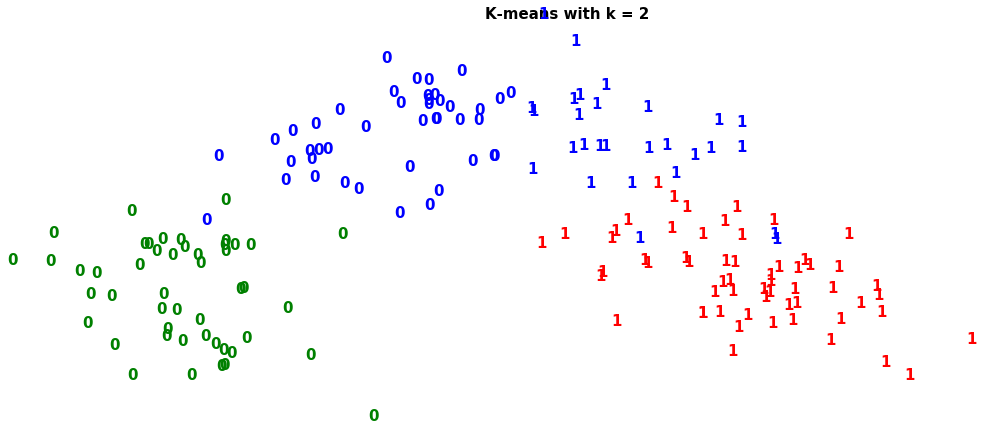

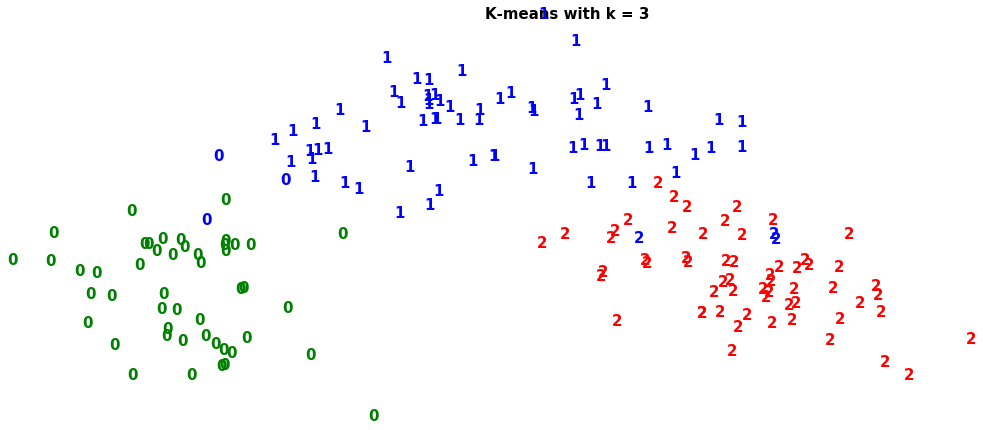

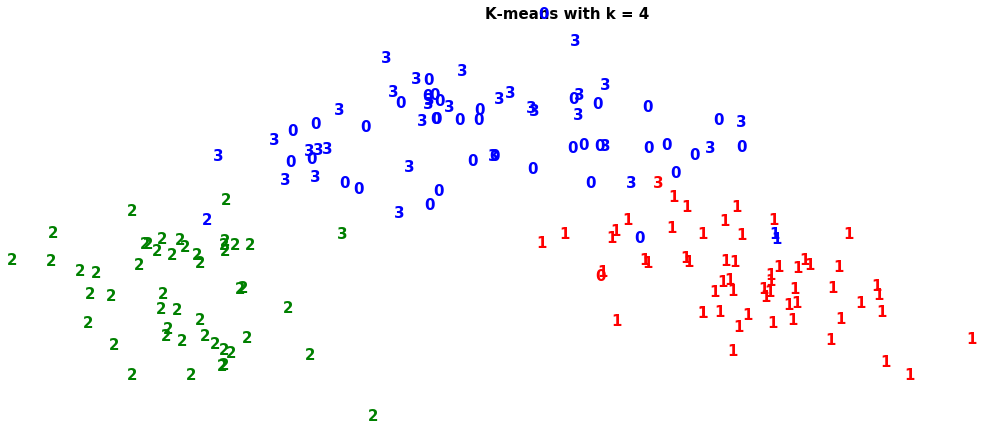

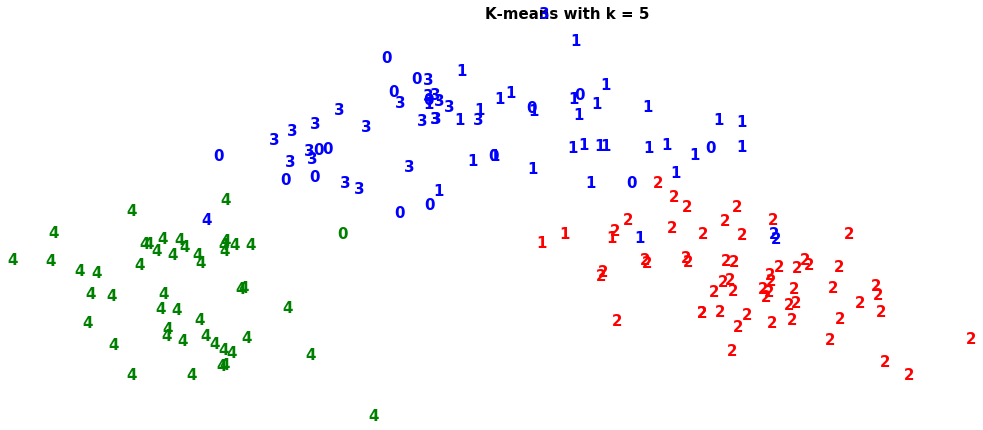

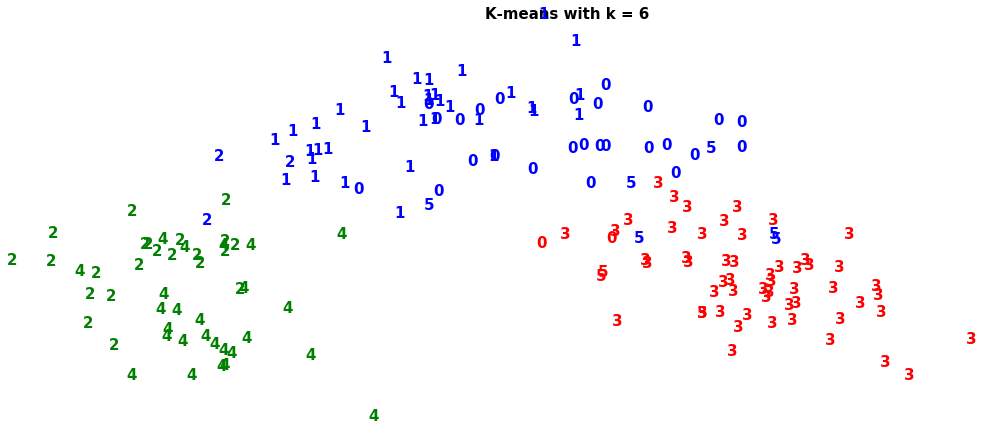

In [0]:
# plot K-means results, with dimensionality reduction by PCA
pca = PCA(n_components=2).fit_transform(X_std)

# modified 'colours' to match earlier plotting; also cast y[i] as int to 
# solve TypeError 'only integer scalar arrays can be converted to a scalar index'
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(2,1))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 15})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[int(y[i])],
                 fontdict={'weight': 'bold', 'size': 15}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Searching across values of K, it looks like K=3, which we know to be the true case, has the best cluster assignment.  Only a few points are assigned by Kmeans incorrectly, for example a couple of '2's are actually '1's (in blue) and a few '0's and 1's are reciprocally mis-assigned.  Overall, Kmeans does a very good job.  Let's test the clusters produced with ARI and Silhouette score.

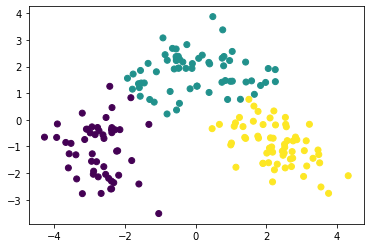

Comparing k-means clusters against the data:
col_0   0   1   2
row_0            
0       0   3  48
1       0  65   0
2      59   3   0
Adjusted Rand Index of the K-Means solution: 0.8974949815093207
The silhoutte score of the K-Means solution: 0.2848589191898987


In [0]:
# Uset standardscalear and PCA to reduce to 2D for visualization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_pca = PCA(2).fit_transform(X_std)

# use K-means with n=2 to predict clusters

y_pred = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

# Adding a line to flatten y to avoid 'Exception: Data must be 
# 1-dimensional' during plotting
y =  y.flatten()

# Plot the solution.

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

from sklearn import metrics
print("Adjusted Rand Index of the K-Means solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred)))
print("The silhoutte score of the K-Means solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

With an ARI close to 1 and a silhouette that is directional towards 1, this looks like a pretty good solution.  And the crosstab indicates that only 6 samples are mis-clustered (3 '0's and 3'2s)

Let's try Hierarchical Clustering and compare clustering performance.

# Clustering by Hierarchical Clustering

In [0]:
# set our target and features and standardize
# set our target 'y' and features 'X'
y = wine_df_target
#change dtype to int so we can iterate the plotting loop for HierClust/PCA
# also flattening, as above, to avoid various ValueErrors
y = np.array(wine_df_target).astype(int) 
y = y.flatten()

X = wine_df_features

# standardize our data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Let's start by using dendrograms and different linkage methods to generate clusters, without specifying a number of clusters a-priori.

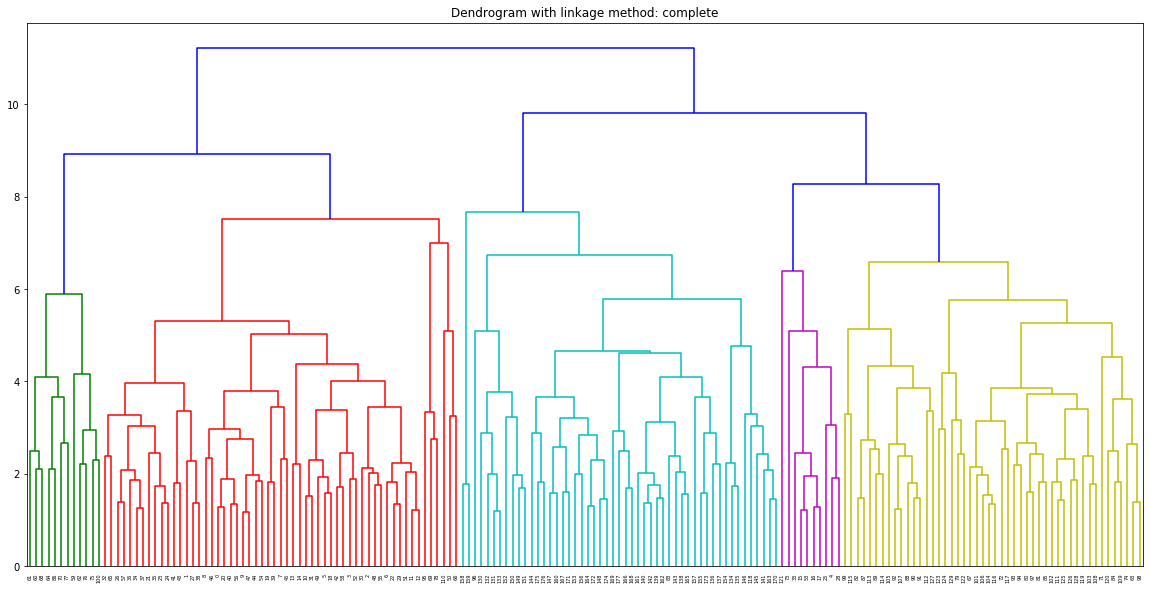

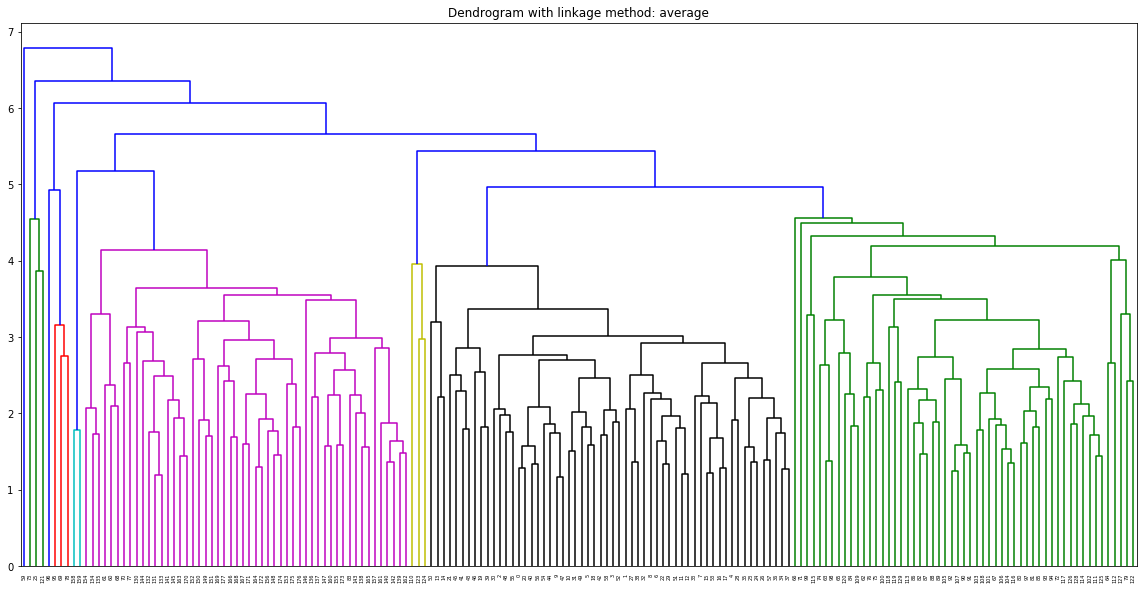

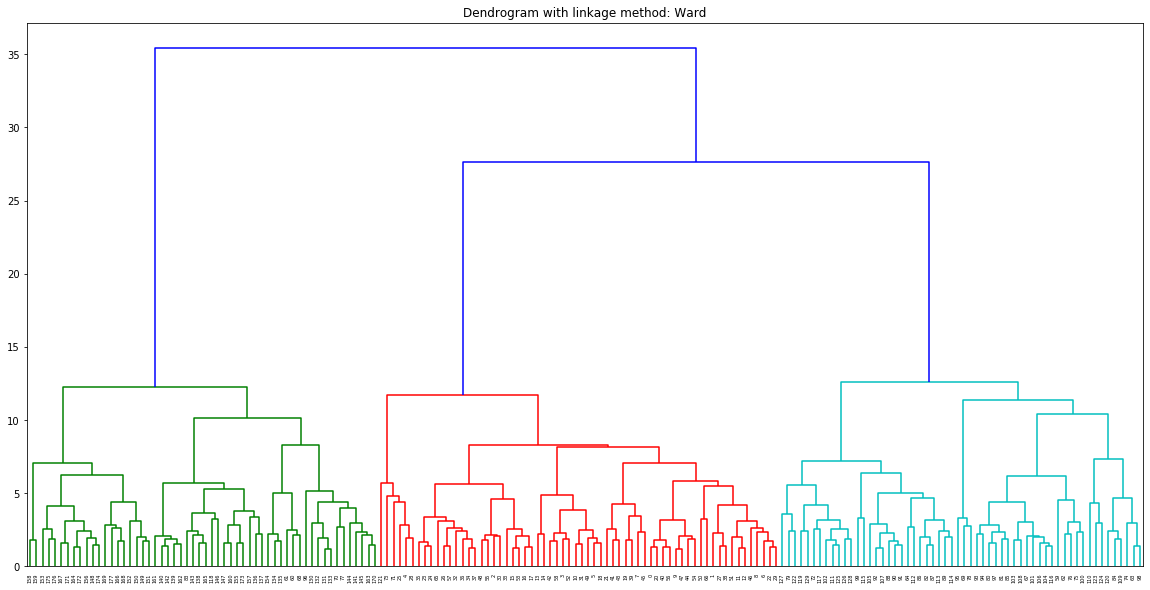

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()


Of the three linkage methods (Complete, Average, Ward) it looks like Ward generates three very symmetrical clusters, that should correspond with our 'true' solution.  Nice!  Complete and Average seem to generate superfluous and often asymmetrically sized clusters.  Let's define agglomerative clustering with specified n_clusters=3 (our true case) and compare.

In [0]:
# Defining the agglomerative clustering
agg_cluster_aver = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters_aver = agg_cluster_aver.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters_aver)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters_aver, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster_comp = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters_comp = agg_cluster_comp.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters_comp)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters_comp, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster_ward = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters_ward = agg_cluster_ward.fit_predict(X_std)

# print cluster metrics
print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters_ward)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters_ward, metric='euclidean')))

ARI score of linkage method average: 0.7847063550518786
Silhouette score of linkage method average: 0.26445785904779395
------------------------------------------------
ARI score of linkage method complete: 0.5972483421815707
Silhouette score of linkage method complete: 0.24425920956454214
------------------------------------------------
ARI score of linkage method ward: 0.7899332213582837
Silhouette score of linkage method ward: 0.2774439826952265


Searching across linkage methods for specified value of clusters=3, it looks like Ward is again the top performer for Agglomerative Clustering as we saw during dendrogram construction. Let's compare crosstab for Ward against the true clusters.

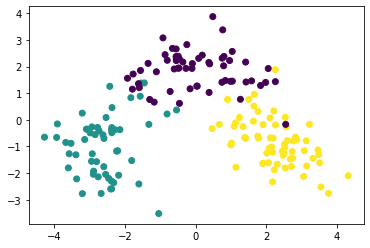

Comparing Agglomerative clusters (Ward) against the data:
col_0   0   1   2
row_0            
0       0  58   0
1       0   8  48
2      59   5   0


In [0]:
# Plot the predicted clusters, colored by target
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_ward)
plt.show()

# Check the solution against the data.
print('Comparing Agglomerative clusters (Ward) against the data:')
print(pd.crosstab(clusters_ward, y))

# Clustering by DBSCAN

In [0]:
# set our target and features and standardize
# set our target 'y' and features 'X'
y = wine_df_target
#change dtype to int so we can iterate the plotting loop for DBSCAN/PCA
# also flattening, as above, to avoid various ValueErrors
y = np.array(wine_df_target).astype(int) 
y = y.flatten()

X = wine_df_features

# standardize our data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Let's start by running DBSCAN with the vanilla settings from the curriculum, and then adjusting eps and min_samples.  Recall that in DBSCAN we don't specify the number of clusters a-priori, so let's keep an eye for solutions that approximate our known case of three clusters/classes.

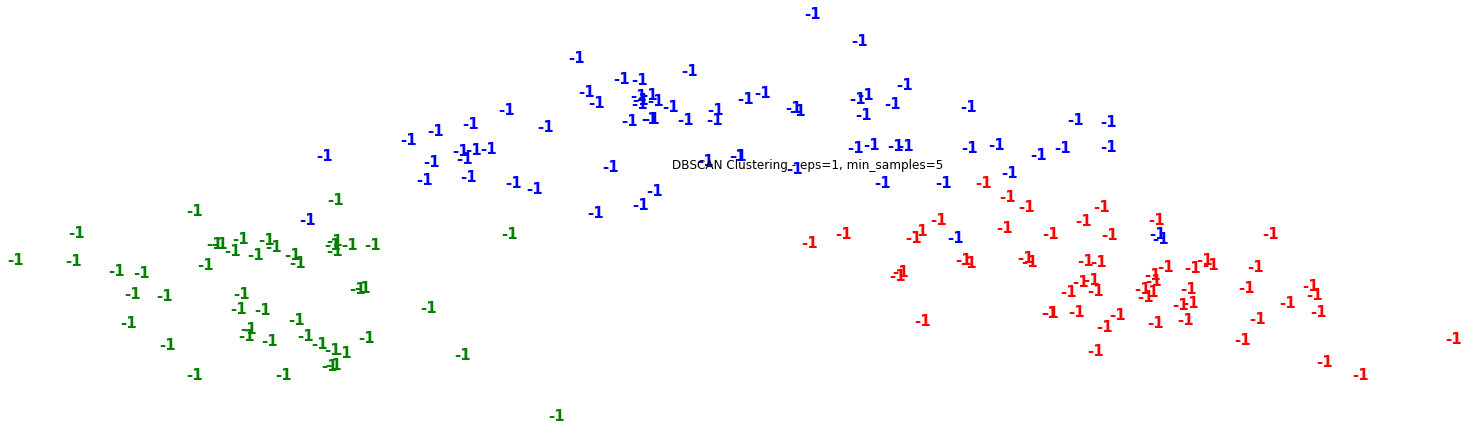

In [0]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering via DBSCAN
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(3,1))
colours =  ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]  #colors to match earlier plotting
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[int(y[i])], # adding the 'int' casting here again
             fontdict={'weight': 'bold', 'size': 15}
        )

plt.xticks([])
plt.title('DBSCAN Clustering - eps=1, min_samples=5')
plt.yticks([])
plt.axis('off')
plt.show()

Everything is noise, labeled as -1. I'll try manipulating neighbors and  epsilon, to see if some neighborhoods can form.

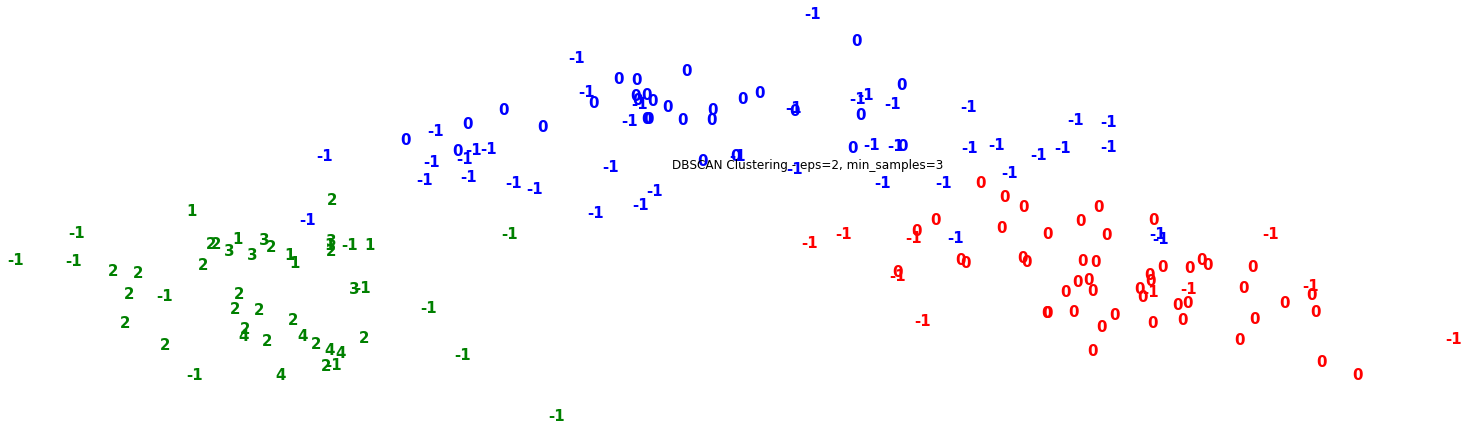

In [0]:
# decrease min_samples
dbscan_cluster = DBSCAN(eps=2, min_samples=3)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(3,1))
colours =  ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]  #colors to match earlier plotting
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[int(y[i])], # adding the 'int' casting here again
             fontdict={'weight': 'bold', 'size': 15}
        )

plt.xticks([])
plt.title('DBSCAN Clustering - eps=2, min_samples=3')
plt.yticks([])
plt.axis('off')
plt.show()

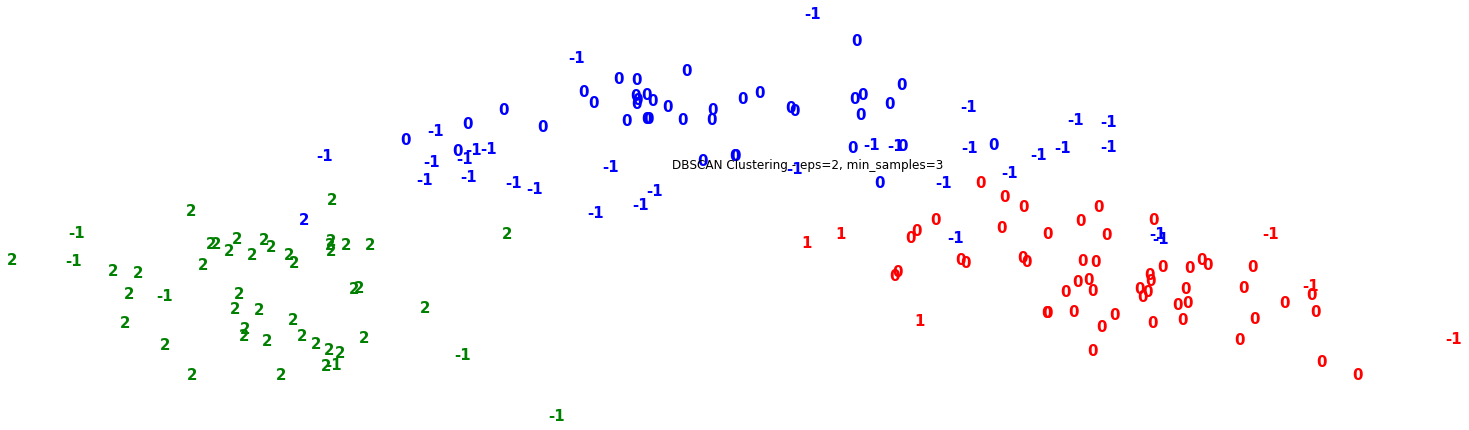

In [0]:
# decrease min_samples
dbscan_cluster = DBSCAN(eps=2.25, min_samples=4)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(3,1))
colours =  ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]  #colors to match earlier plotting
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[int(y[i])], # adding the 'int' casting here again
             fontdict={'weight': 'bold', 'size': 15}
        )

plt.xticks([])
plt.title('DBSCAN Clustering - eps=2.25, min_samples=4')
plt.yticks([])
plt.axis('off')
plt.show()

After some brute force, not shown for brevity, I landed on eps=2.25 and min_samples=4 as the best case.  Higher min samples or higher epsilon results in collapse into two classes, where 'red' class 0  and 'blue' class 1 are collapsed, and green is distinct as class '1' instead of '2'.  Decreasing number of neighbors increases the number of neighborhoods/clusters formed, but not in a fashion that matches our known true case of three clusters.  There are also a handful of noise points still left, even with these semi-optimized hyperparameters.

Let's check the cluster shape and clustering success relative to our known classes.

ARI score of DBSCAN Clustering: 0.4099830637183021
Silhouette score of DBSCAN Clustering: 0.01994904988387414


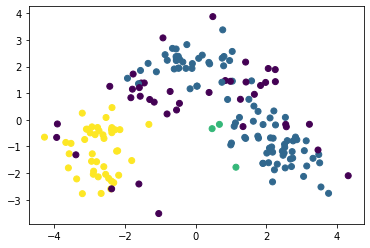

Comparing DBSCAN clusters against the known data:
col_0   0   1   2
row_0            
-1      3  31   6
 0     53  39   0
 1      3   0   0
 2      0   1  42


In [0]:
# print cluster metrics
print("ARI score of DBSCAN Clustering: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of DBSCAN Clustering: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

# Plot the predicted clusters, colored by target
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.show()

# Check the solution against the data.
print('Comparing DBSCAN clusters against the known data:')
print(pd.crosstab(clusters, y))

As indicated above, our clustering here via DBSCAN doesn't seem to match our true classes very well.  Noise points (-1) in purple make up a substantial number of our samples (40 of 178), nearly 25%. Additionally, as also indicated above, class '1' basically is lost when clusting by DBSCAN, with all samples either lost to noise (31) or assigned incorrectly as 0's (39) or 2's (1 sample). 

Considering the poor cluster assignment, as well as near zero silhouette score and low ARI (~0.41), DBSCAN is definitely the worst performer so far.   I'll try GMM, and do a final comparison of performance to wrap up.

# Clustering by GMM

In [0]:
# set our target and features and standardize
# set our target 'y' and features 'X'
y = wine_df_target
#change dtype to int so we can iterate the plotting loop for DBSCAN/PCA
# also flattening, as above, to avoid various ValueErrors
y = np.array(wine_df_target).astype(int) 
y = y.flatten()

X = wine_df_features

# standardize our data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Let's run GMM with all three covariance types and compare performance; we don't specify number of clusters a-priori. As before, we'll keep an eye for solutions that approximate our known case of three clusters/classes.

In [0]:
from sklearn.mixture import GaussianMixture

# Defining GMM as our agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=full: 0.4394391043947633
Silhouette score with covariance_type=full: 0.2682319543159216
------------------------------------------------------
ARI score with covariance_type=tied: 0.45356971295106
Silhouette score with covariance_type=tied: 0.2642795592531001
------------------------------------------------------
ARI score with covariance_type=diag: 0.36739653939220057
Silhouette score with covariance_type=diag: 0.262131308657968
------------------------------------------------------
ARI score with covariance_type=spherical: 0.4391798619311299
Silhouette score with covariance_type=spherical: 0.2632827220055611
------------------------------------------------------


'Tied' covariance seems to have the best ARI score, and second best silhouette score.  I recall from the curriculum that silhouette scores/shape can be depressed if clusters are close together/overlapping, despite scenarios where ARI (actual cluster performance).  We already know this to be our scenario from the dimensionality reduction and other clustering runs, where clusters are ill-defined, overlapping, or outright inseparable.  So we can deprioritize silhouette a bit, in favor of a maximal ARI. 

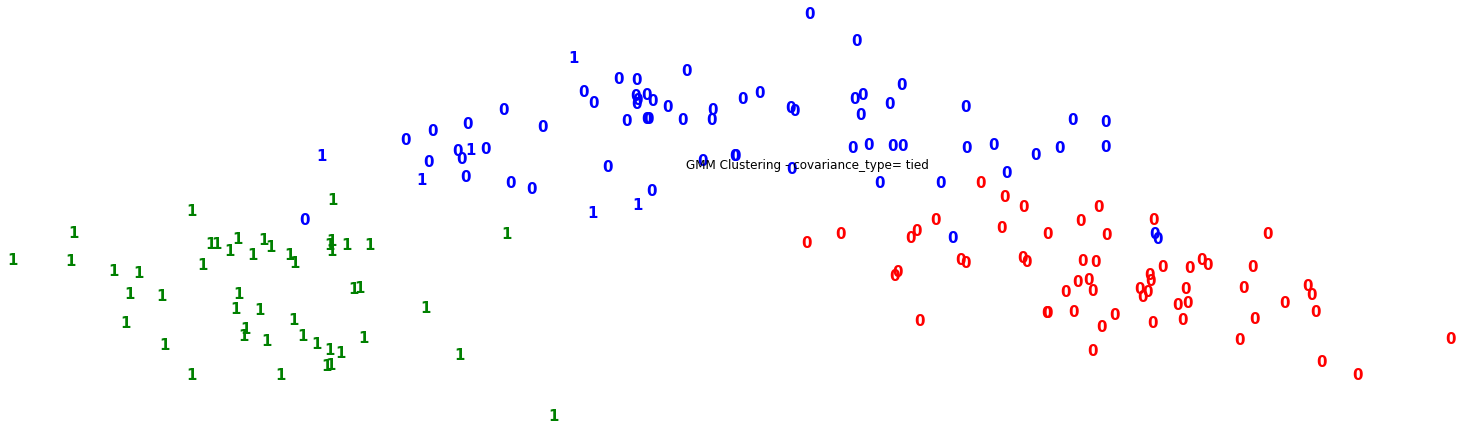

In [0]:
# Defining the agglomerative clustering
gmm_cluster_tied = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters_tied = gmm_cluster_tied.fit_predict(X_std)

# plot GMM covariance type that had best shape metrics; in this case, 'tied'
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(3,1))
colours =  ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]  #colors to match earlier plotting
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_tied[i]),
             color=colours[int(y[i])], # adding the 'int' casting here again
             fontdict={'weight': 'bold', 'size': 15}
        )

plt.xticks([])
plt.title('GMM Clustering - covariance_type= tied')
plt.yticks([])
plt.axis('off')
plt.show()

Not great - we have a collapsed cluster of 0/1 (red/blue) and 2 (green) separated as it's own cluster.  This seems to be the trend across all tools employed.  There is even some misclassification of 1's as 2's (blue as green) and vice versa.

Let's plot the worst performer base on ARI, 'diag', to see what additional errors occur with that hyperparameter.

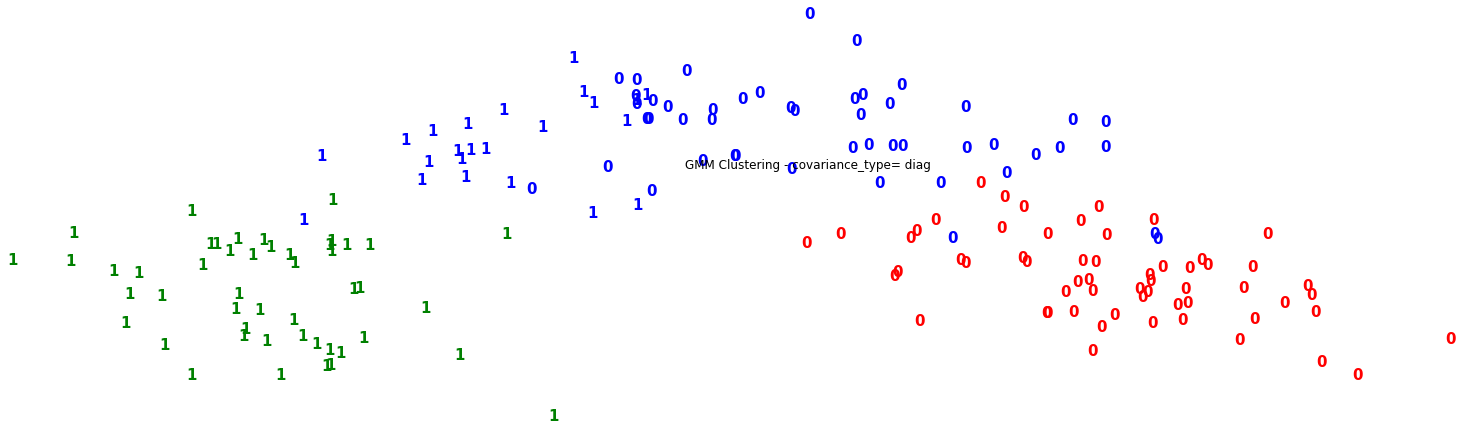

In [0]:
# Defining the agglomerative clustering
gmm_cluster_diag = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters_diag = gmm_cluster_diag.fit_predict(X_std)

# plot GMM covariance type that had best shape metrics; in this case, 'diag'
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(3,1))
colours =  ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]  #colors to match earlier plotting
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_diag[i]),
             color=colours[int(y[i])], # adding the 'int' casting here again
             fontdict={'weight': 'bold', 'size': 15}
        )

plt.xticks([])
plt.title('GMM Clustering - covariance_type= diag')
plt.yticks([])
plt.axis('off')
plt.show()

Further misclassification of 1's (blue) as 2's (green) occur when covariance is 'diagonal'.  Definitely worse.

Let's check the crosstab for the best performer ('tied') and wrap up.

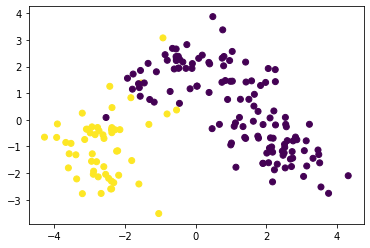

Comparing DBSCAN clusters against the known data:
col_0   0   1   2
row_0            
0      59  65   0
1       0   6  48


In [0]:
# Plot the predicted clusters, colored by target
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_tied)
plt.show()

# Check the solution against the data.
print('Comparing GMM clusters against the known data:')
print(pd.crosstab(clusters_tied, y))

In this case, class '2' is actually classified with decent separation, but crosstab indicates misclassification as '1' just due to mislabeling.  The main issue here is that class 0 and class 1 are essentially merged in this clustering solution, all classified as 0.  Covariance and silhouette are both low here as well, stemming from the overlapping classes of 0/1 in some regions, and an overall disperse appearance. 

# Comparison of Clustering Methods (K-Means, Hierarchical Clustering, DBSCAN, GMM)

Because they both were able to generate three clusters, K-Means and Agglomerative clustering are clearly the top two performers.  Looking into crosstab results, K-means appears to be the top performer, with only 6 misclassifications (ignoring the mis-labeled/swapped 0/2 classes in the crosstab).  Based on ARI and Silhouette Score, K-Means is again the top performer, with very high ARI (~0.9); Agglomerative Clustering with ward linkage is close in silhouette, but is substantially worse in ARI.

Given that both K-Means and Agglomerative clustering allow us to pre-specify the number of clusters, this is unsurprising.  We give these algorithms the answer, and they find the scenario that fits it.

DBSCAN and GMM, which don't have an a-priori n_cluster hyperparameter, are forced to construct these clusters in a truly unsupervised fashion.  From what we know of the data via after dimensionality reduction, two of the classes are very similar; DBSCAN and GMM fall prey to this, and are unable to separate them.  In a larger dataset, perhaps these two methods would perform better. 